In [23]:
# https://www.kaggle.com/hb20007/gender-classification/home
import pandas as pd

In [39]:
train = pd.read_csv('data/gender_classification.csv');

In [41]:
train.head(10)

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
5,Warm,Jazz/Blues,Doesn't drink,Fanta,F
6,Cool,Pop,Beer,Coca Cola/Pepsi,F
7,Warm,Pop,Whiskey,Fanta,F
8,Warm,Rock,Other,7UP/Sprite,F
9,Neutral,Pop,Wine,Coca Cola/Pepsi,F


In [26]:
train.shape

(66, 5)

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
Favorite Color          66 non-null object
Favorite Music Genre    66 non-null object
Favorite Beverage       66 non-null object
Favorite Soft Drink     66 non-null object
Gender                  66 non-null object
dtypes: object(5)
memory usage: 2.7+ KB


In [47]:
train["Favorite Color"].isnull().sum()

0

In [28]:
def bar_chart(feature):
    male = train[train['Gender']=='M'][feature].value_counts()
    female = train[train['Gender']=='F'][feature].value_counts()
    df = pd.DataFrame([male,female])
    df.index = ['Male','Female']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

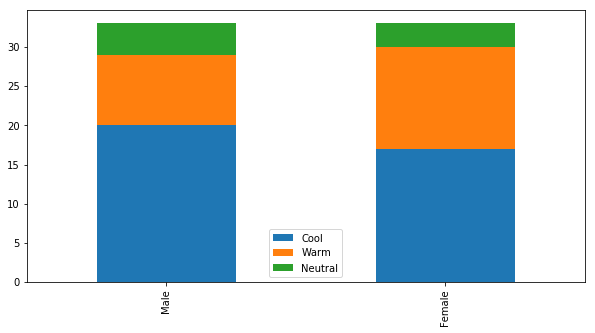

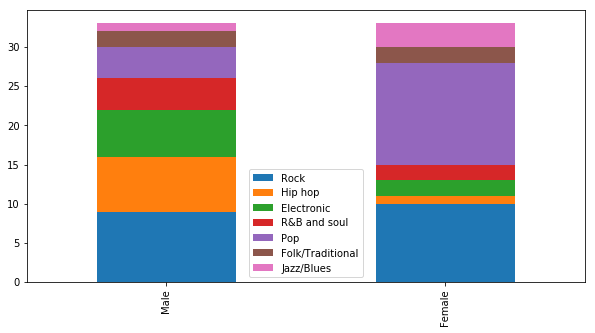

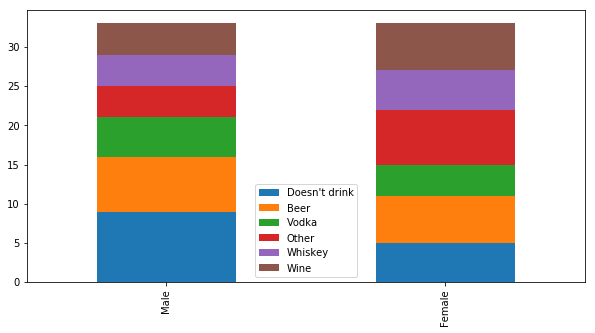

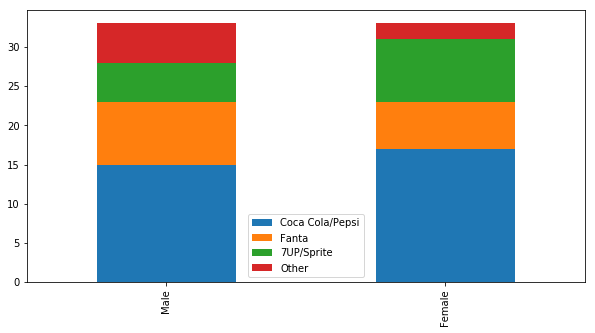

In [29]:
bar_chart('Favorite Color')
bar_chart('Favorite Music Genre')
bar_chart('Favorite Beverage')
bar_chart('Favorite Soft Drink')

In [48]:
train["Favorite Color"].value_counts()
color_mapping = {"Cool": 0, "Warm": 1, "Neutral": 2}
for dataset in [train]:
    dataset['color'] = dataset['Favorite Color'].map(color_mapping)

In [49]:
train['Favorite Beverage'].value_counts()
beverage_mapping = {"Doesn't drink": 0, "Beer": 1, "Other": 2, "Wine": 3, "Whiskey": 4, "Vodka": 5}
for dataset in [train]:
    dataset['beverage'] = dataset['Favorite Beverage'].map(beverage_mapping)
    

In [50]:
train['Favorite Music Genre'].value_counts()
music_mapping = {"Rock": 0, "Pop": 1, "Electronic": 2, "Hip hop": 3, "R&B and soul": 4, "Jazz/Blues": 5, "Folk/Traditional": 6}
for dataset in [train]:
    dataset['music'] = dataset['Favorite Music Genre'].map(music_mapping)
    

In [51]:
train['Favorite Soft Drink'].value_counts()
softdrink_mapping = {"Coca Cola/Pepsi": 0, "Fanta": 1, "7UP/Sprite": 2, "Other": 3}
for dataset in [train]:
    dataset['softdrink'] = dataset['Favorite Soft Drink'].map(softdrink_mapping)
    

In [52]:
train['Gender'].value_counts()
gender_mapping = {"F": 0, "M": 1}
for dataset in [train]:
    dataset['gender'] = dataset['Gender'].map(gender_mapping)

In [53]:
features_drop = ['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage', 'Favorite Soft Drink', 'Gender']
train = train.drop(features_drop, axis=1)

In [55]:
train.head(66)

,color,beverage,music,softdrink,gender
0,0,5,0,2,0
1,2,5,3,0,0
2,1,3,0,0,0
3,1,4,6,1,0
4,0,5,0,0,0
5,1,0,5,1,0
6,0,1,1,0,0
7,1,4,1,1,0
8,1,2,0,2,0
9,2,3,1,0,0
